In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/f1/13/63c35603f07f549b0d044b6001956aeb941850e0ef75ef7c8eb8b0e410ab/yfinance-1.1.0-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/38/74/f94141b38a51a553efef7f510fc213894161ae49b88bffd037f8d2a7cb2f/frozendict-2.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for peewee>=3.16.2 from https://files.pythonhosted.org/packages/1a/41/19c65578ef9a54b3083253c68a607f099642747168fe00f3a2bceb7c3a34/peewee-3.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for curl_cffi<0.14,>=0.7 from https://files.pythonhosted.org/packages/77/81/5bdb7dd0d669a817397b2e92193559bf66c3807f5848a48ad10cf02bf6c7/curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_

In [24]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objects as go
import yfinance as yf
import statsmodels.api as sm
import plotly.express as px

from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [25]:
stocklist = ['TATASTEEL.NS', '^NSEI']
stocklist

['TATASTEEL.NS', '^NSEI']

In [26]:
df = yf.download(stocklist, start='2020-01-01', end='2025-12-31')
df

[*********************100%***********************]  2 of 2 completed


Price             Close                       High                        Low  \
Ticker     TATASTEEL.NS         ^NSEI TATASTEEL.NS         ^NSEI TATASTEEL.NS   
Date                                                                            
2020-01-01    39.250175  12182.500000    39.984412  12222.200195    39.002631   
2020-01-02    40.685081  12282.200195    40.932622  12289.900391    39.606803   
2020-01-03    40.588585  12226.650391    40.798367  12265.599609    40.231956   
2020-01-06    39.711689  11993.049805    40.278099  12179.099609    39.485124   
2020-01-07    39.950848  12052.950195    40.664104  12152.150391    39.736869   
...                 ...           ...          ...           ...          ...   
2025-12-24   170.070007  26142.099609   171.649994  26236.400391   169.669998   
2025-12-25   170.070007           NaN   170.070007           NaN   170.070007   
2025-12-26   169.119995  26042.300781   169.899994  26144.199219   167.820007   
2025-12-29   172.300003  25942.099609   174.130005  26106.800781   169.289993   
2025-12-30   175.800003  25938.849609   176.350006  25976.750000   170.800003   

Price                            Open                     Volume            
Ticker             ^NSEI TATASTEEL.NS         ^NSEI TATASTEEL.NS     ^NSEI  
Date                                                                        
2020-01-01  12165.299805    39.690715  12202.150391    121005300  304100.0  
2020-01-02  12195.250000    39.606803  12198.549805    216749610  407700.0  
2020-01-03  12191.349609    40.529846  12261.099609    129568630  428800.0  
2020-01-06  11974.200195    40.278099  12170.599609     96016080  396500.0  
2020-01-07  12005.349609    39.900499  12079.099609    131957880  447800.0  
...                  ...          ...           ...          ...       ...  
2025-12-24  26123.000000   171.350006  26170.650391     17430406  188800.0  
2025-12-25           NaN   170.070007           NaN            0       NaN  
2025-12-26  26008.599609   169.889999  26121.250000     16904834  142200.0  
2025-12-29  25920.300781   169.509995  26063.349609     48001907  234300.0  
2025-12-30  25878.000000   172.779999  25940.900391     33741158  396900.0  

[1488 rows x 10 columns]

In [27]:
df.Close

Ticker,TATASTEEL.NS,^NSEI
Date,,
2020-01-01,39.250175,12182.500000
2020-01-02,40.685081,12282.200195
2020-01-03,40.588585,12226.650391
2020-01-06,39.711689,11993.049805
2020-01-07,39.950848,12052.950195
...,...,...
2025-12-24,170.070007,26142.099609
2025-12-25,170.070007,NaN
2025-12-26,169.119995,26042.300781


In [28]:
monthly_returns = df.Close.resample('M').ffill().pct_change()
monthly_returns.dropna()

Ticker,TATASTEEL.NS,^NSEI
Date,,
2020-02-29,-0.129815,-0.063563
2020-03-31,-0.293779,-0.232464
2020-04-30,0.106454,0.146800
2020-05-31,-0.010392,-0.028357
2020-06-30,0.106707,0.075342
...,...,...
2025-08-31,-0.021907,-0.013788
2025-09-30,0.092504,0.007543
2025-10-31,0.083368,0.045142


In [29]:
x = monthly_returns['^NSEI']
y = monthly_returns['TATASTEEL.NS']

x_sm = sm.add_constant(x)

In [30]:
x_sm_clean = x_sm.dropna()
y_clean = y[x_sm_clean.index]

In [31]:
model = sm.OLS(y_clean, x_sm_clean)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TATASTEEL.NS   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     48.73
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.44e-09
Time:                        04:16:31   Log-Likelihood:                 73.207
No. Observations:                  71   AIC:                            -142.4
Df Residuals:                      69   BIC:                            -137.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.011      1.031      0.306      -0.010       0.032
^NSEI          1.4176      0.203      6.981      0.000       1.012       1.823
==============================================================================
Omnibus:                        7.675   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.128
Skew:                           0.643   Prob(JB):                       0.0283
Kurtosis:                       3.868   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

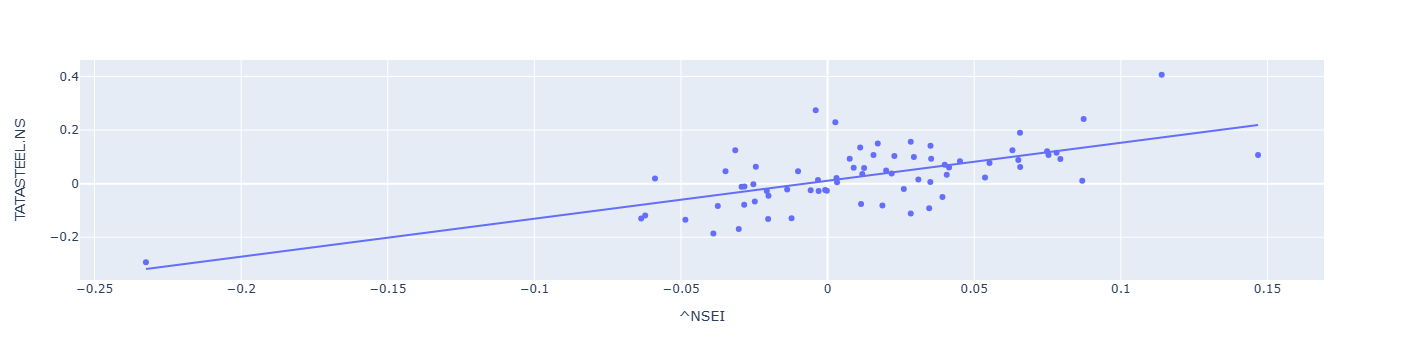

In [32]:
fig = px.scatter(monthly_returns, x='^NSEI', y='TATASTEEL.NS', trendline="ols")
fig.show()